In [5]:
Packages <- c("dplyr","broom","cubature", "geosphere", "data.table",  "ggplot2", "bbmle", "dplyr","tidyr", "stringr", "tidyverse", "lubridate", "RColorBrewer")

invisible(suppressPackageStartupMessages(lapply(Packages, library, character.only = TRUE)))

setwd('/local/home/katrinac/oceanography')
"%!in%" <- function(x,table) match(x,table, nomatch = 0) == 0
source("~/parentage/kernel_fitting/1340_loci/functions/ll_kt_both_bbmle.R")
source("~/parentage/kernel_fitting/1340_loci/functions/GenGausKernInt_sum0.5.R") #integrate_kernel_sum1
source("~/parentage/kernel_fitting/1340_loci/functions/GenGausKernInt_sum1.R") #integrate_kernel_sum0.5
source("~/parentage/kernel_fitting/1340_loci/functions/cdf_solve.R") #median
source("~/parentage/kernel_fitting/1340_loci/functions/cdf_solve90.R") #dist 90% retained
source("~/parentage/kernel_fitting/1340_loci/functions/GenGausKernPDF.R")


In [ ]:
#calculate summary stats like mdd, median, kerutosis, and dist 90 retained
#plot summary stats with overlays of empirical fits
#test for rank ordered correlations


In [60]:
#read in the kernel ensembles with no adjustments
SimKernels2012 <- read.csv(file="~/oceanography/script_output/KernelFits/NoAdjust/1000SimulatedKernels2012.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="no")
SimKernels2013 <- read.csv(file="~/oceanography/script_output/KernelFits/NoAdjust/1000SimulatedKernels2013.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="no")
SimKernels2014 <- read.csv(file="~/oceanography/script_output/KernelFits/NoAdjust/1000SimulatedKernels2014.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="no")
SimKernelsAll <- read.csv(file="~/oceanography/script_output/KernelFits/NoAdjust/1000SimulatedKernelsAll.csv", header=T) %>%
    mutate(year="2012-14") %>%
    mutate(Adj="no") 


#read in the kernel ensembles with survival and NoRecentRec adjustments
SimKernels2012SurvNoRecentRec <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_Survival_NoRecentRecruits/1000SimulatedKernels2012SurvNoRecentRec.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="SurvNoRecentRec")
SimKernels2013SurvNoRecentRec <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_Survival_NoRecentRecruits/1000SimulatedKernels2013SurvNoRecentRec.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="SurvNoRecentRec")
SimKernels2014SurvNoRecentRec <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_Survival_NoRecentRecruits/1000SimulatedKernels2014SurvNoRecentRec.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="SurvNoRecentRec")
#SimKernelsAllSurvNoRecentRec <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_Survival_NoRecentRecruits/1000SimulatedKernelsAllSurvNoRecentRec.csv", header=T) %>%
#    mutate(year="2012-14") %>%
#    mutate(Adj="SurvNoRecentRec")


#read in the kernel ensembles with only NoRecentRec adjustments
SimKernels2012NoRecentRec <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_NoRecentRecruits/1000SimulatedKernels2012NoRecentRec.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="NoRecentRec")
SimKernels2013NoRecentRec <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_NoRecentRecruits/1000SimulatedKernels2013NoRecentRec.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="NoRecentRec")
SimKernels2014NoRecentRec <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_NoRecentRecruits/1000SimulatedKernels2014NoRecentRec.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="NoRecentRec")
#SimKernelsAllNoRecentRec <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_NoRecentRecruits/1000SimulatedKernelsAllNoRecentRec.csv", header=T) %>%
#    mutate(year="2012-14") %>%
#    mutate(Adj="NoRecentRec")

#read in the kernel ensembles with only NoRecentRec adjustments
SimKernels2012Surv <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_Survival/1000SimulatedKernels2012Surv.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="Surv")
SimKernels2013Surv <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_Survival/1000SimulatedKernels2013Surv.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="Surv")
SimKernels2014Surv <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_Survival/1000SimulatedKernels2014Surv.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="Surv")
#SimKernelsAllSurv <- read.csv(file="~/oceanography/script_output/KernelFits/Adjust_Survival/1000SimulatedKernelsAllSurv.csv", header=T) %>%
#    mutate(year="2012-14") %>%
#    mutate(Adj="Surv")


CombinedSims <- bind_rows(SimKernels2012, SimKernels2013, SimKernels2014,  SimKernelsAll, 
                          SimKernels2012SurvNoRecentRec, SimKernels2013SurvNoRecentRec, SimKernels2014SurvNoRecentRec,
                            
                             
                          SimKernels2012NoRecentRec, SimKernels2013NoRecentRec, SimKernels2014NoRecentRec,  
                              
                          
                          SimKernels2012Surv, SimKernels2013Surv, SimKernels2014Surv 
                              ) 

#SimKernelsAllSurv, SimKernelsAllNoRecentRec,  SimKernelsAllSurvNoRecentRec,
#write.csv(CombinedSims, file="~/oceanography/script_output/KernelFits/CombinedSimulationKernelFits.csv", row.names=F)

In [61]:
CombinedSims <- read.csv(file="~/oceanography/script_output/KernelFits/CombinedSimulationKernelFitsNoOther.csv", header=T, stringsAsFactors = F)

In [62]:
head(CombinedSims)
tail(CombinedSims)

year,k,theta,mdd,med,dist90,iteration,Adj
2012,-2.8047543,2.4693966,8.699709,7.64,17.43,1,no
2012,-2.8511524,2.7437224,8.893662,7.94,17.59,2,no
2012,-1.5418595,0.6919798,9.559210,5.57,23.29,3,no
2012,-2.1396522,1.0090828,8.388683,5.84,19.29,4,no
2012,-2.1590598,1.0295803,8.319246,5.83,19.06,5,no
2012,-0.8263778,0.5313308,10.753144,5.28,26.99,6,no


,year,k,theta,mdd,med,dist90,iteration,Adj
15995,2012-14,-2.632233,1.539844,9.006121,7.17,19.32,995,Surv
15996,2012-14,-2.539874,1.305963,9.338749,7.10,20.57,996,Surv
15997,2012-14,-2.606416,1.322245,9.871634,7.53,21.70,997,Surv
15998,2012-14,-2.419790,1.115747,9.751124,7.04,22.05,998,Surv
15999,2012-14,-2.757454,1.600655,9.955226,8.00,21.22,999,Surv
16000,2012-14,-2.671965,1.478654,9.639114,7.59,20.81,1000,Surv


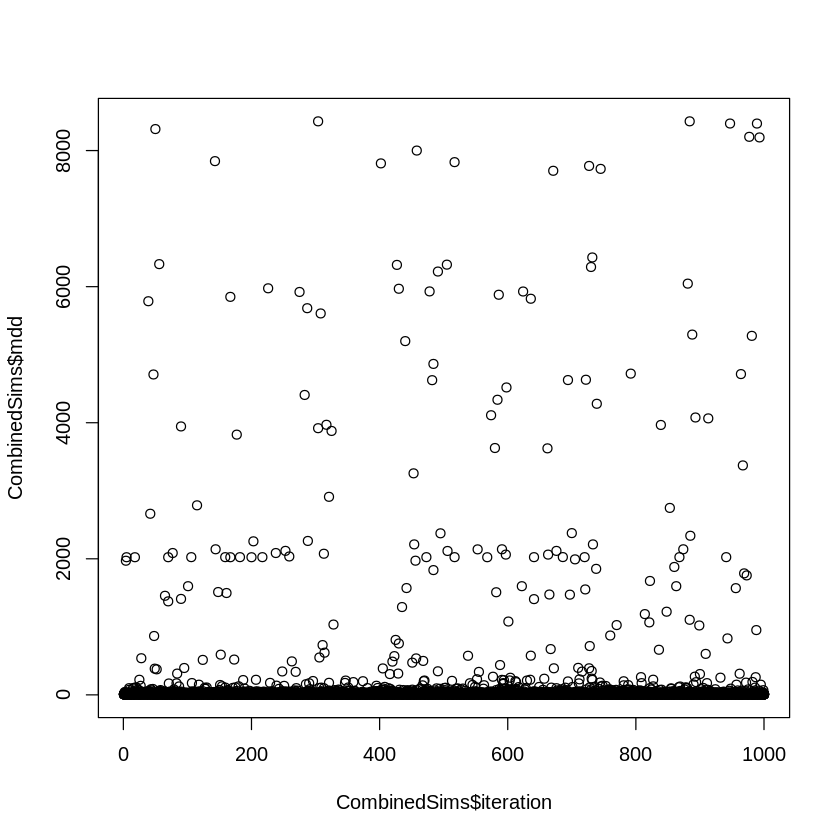

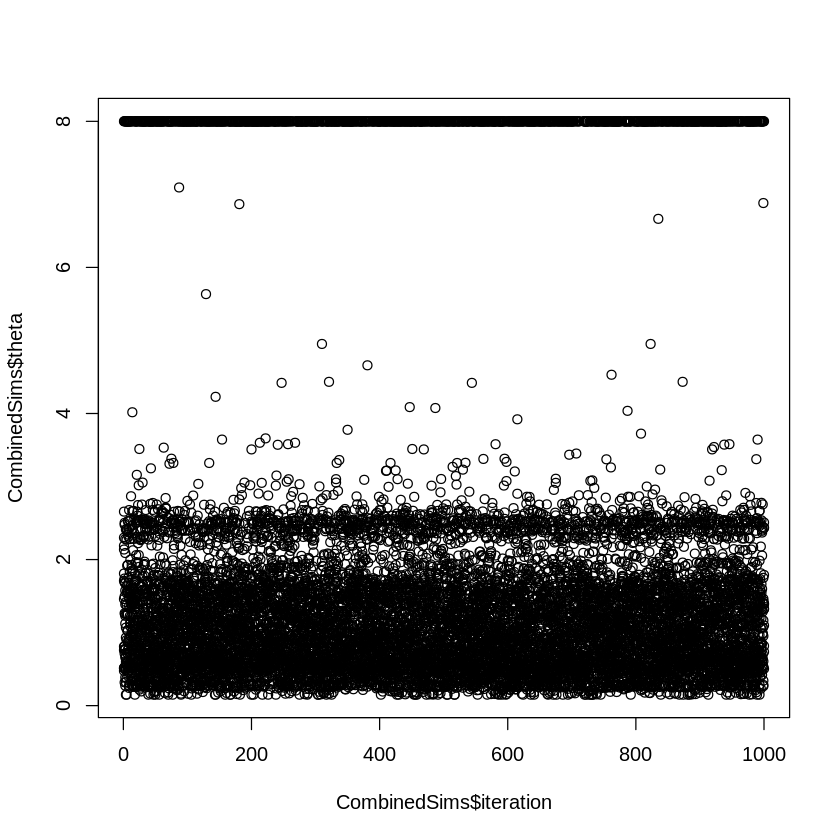

In [52]:
#check for obvious bias based on iteration, which would point to a problem in the for loop. Seems fine to me though 03/23/2021
plot(CombinedSims$mdd ~ CombinedSims$iteration)
plot(CombinedSims$theta ~ CombinedSims$iteration)

In [63]:
#FROM AFTER 1000 SIMS AND SAND FLATS excluded

#that's a fit where theta is at the boundary, not a good fit
CombinedSims %>%
    group_by(Adj, year) %>%
    filter(k==10 |k==-10 | theta==0.15 |theta== 8) %>% #how often are the fits at the boundary? as in, bad
    summarise(NObsBoundary=n()) %>%
    arrange(NObsBoundary) %>%
    filter(year=="2014") %>% #zero in on 2014
    ungroup() %>%
    summarise(NObsBoundary2014=sum(NObsBoundary))

nrow(CombinedSims %>% filter(year=="2014" & theta==8))


`summarise()` regrouping output by 'Adj' (override with `.groups` argument)


NObsBoundary2014
1187


[1] 1172

In [64]:
MeanFits <-  CombinedSims %>% 
    select(-iteration) %>%
    group_by(year, Adj) %>%
    summarise_each(funs(mean)) %>%
    #rename(Year="year", AvgSimK="k", AvgSimTheta="theta", AvgSimMDD="mdd", AvgSimMed="med", AvgSimDist90="dist90") %>%
    mutate(DataType="Sim", Stat="Mean")#mark these as simulations

MinFits <-  CombinedSims %>% 
    select(-iteration) %>%
    group_by(year, Adj) %>%
    summarise_each(funs(min)) %>%
    #rename(Year="year", MinSimK="k", MinSimTheta="theta", MinSimMDD="mdd", MinSimMed="med", MinSimDist90="dist90")
    mutate(DataType="Sim", Stat="Min")#mark these as simulations

MaxFits <-  CombinedSims %>% 
    select(-iteration) %>%
    group_by(year, Adj) %>%
    summarise_each(funs(max)) %>%
    #rename(Year="year", MaxSimK="k", MaxSimTheta="theta", MaxSimMDD="mdd", MaxSimMed="med", MaxSimDist90="dist90")
    mutate(DataType="Sim", Stat="Max")#mark these as simulations

MedFits <-  CombinedSims %>% 
    select(-iteration) %>%
    group_by(year, Adj) %>%
    summarise_each(funs(median)) %>%
    #rename(Year="year", MedSimK="k", MedSimTheta="theta", MedSimMDD="mdd", MedSimMed="med", MedSimDist90="dist90")
    mutate(DataType="Sim", Stat="Med")#mark these as simulations

SDFits <-  CombinedSims %>% 
    select(-iteration) %>%
    group_by(year, Adj) %>%
    summarise_each(funs(sd)) %>%
    #rename(Year="year", SDSimK="k", SDSimTheta="theta", SDSimMDD="mdd", SDSimMed="med", SDSimDist90="dist90")
    mutate(DataType="Sim", Stat="SD")#mark these as simulations

CVWithin <- CombinedSims %>% #make a data frame that has the CV for select parameters/summary stats WITHIN an ensemble
    select(-iteration) %>%
    group_by(year, Adj) %>%
    mutate(mdd=sd(mdd)/mean(mdd)) %>%
    mutate(k=sd(k)/mean(k)) %>%
    mutate(theta=sd(theta)/mean(theta)) %>%
    mutate(med=sd(med)/mean(med)) %>%
    distinct(year, Adj, .keep_all = T) %>%
    mutate(DataType="Sim", Stat="CVWithin")#mark these as simulations

CVAmongAnnual <- CombinedSims %>% #make a data frame that has the CV for select parameters/summary stats among a case (as in, ensembles correcting for no recent recruits)
    select(-iteration) %>%
    filter(year %in% c("2012", "2013", "2014")) %>%
    group_by(Adj) %>%
    mutate(mdd=sd(mdd)/mean(mdd)) %>%
    mutate(k=sd(k)/mean(k)) %>%
    mutate(theta=sd(theta)/mean(theta)) %>%
    mutate(med=sd(med)/mean(med)) %>%
    distinct(year, Adj, .keep_all = T) %>%
    mutate(DataType="Sim", Stat="CVAmongAnnual")#mark these as simulations
 

SimSummary <- bind_rows(MeanFits, MinFits, MaxFits, MedFits, SDFits, CVWithin, CVAmongAnnual) %>%
    select(year, Adj, DataType, Stat, everything()) %>%
    rename(Year="year")

#gather into long form
SimSummary <- SimSummary %>% 
    gather(5:9, key="metric", value="value") 
SimSummary$value <- round(SimSummary$value, digits=2)
    
                        
#write.csv(SimSummary, file="~/oceanography/script_output/KernelFits/SimulationKernelFitsSummary.csv", row.names=F)

In [65]:
head(SimSummary)

Year,Adj,DataType,Stat,metric,value
2012,no,Sim,Mean,k,-1.38
2012,NoRecentRec,Sim,Mean,k,-1.29
2012,Surv,Sim,Mean,k,-1.47
2012,SurvNoRecentRec,Sim,Mean,k,-1.11
2012-14,no,Sim,Mean,k,-2.14
2012-14,NoRecentRec,Sim,Mean,k,-1.69


In [133]:
#read in the empirical data
kernels <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/tables/kernel_fitting_summary.csv", header=T, stringsAsFactors = F)  %>%
    rename(k="best_k", theta="best_theta", mdd="MeanDispDist", med="MedianDispDist", dist90="Dist90Retained") %>%
    select(Year, k, theta, mdd, med, dist90) %>%
    mutate(Adj=NA, DataType="Gen")

kernel2012_14 <- read.csv(file="~/oceanography/empirical_data/genetics/GenKernelsForROMSComp2012-14.csv", header=T, stringsAsFactors = F) %>%
    rename(Year="year")

kernels2 <- bind_rows(kernels, kernel2012_14) %>% 
    mutate(Adj=NA, DataType="Gen") %>%
    filter(Year %in% c("2012", "2013", "2014", "2012-14")) %>% #exclude to only years matching the ROMS model for now
    mutate(Stat="MLE") %>%
    select(Year, Adj, DataType, Stat, everything()) %>%
    gather(5:9, key="metric", value="value")

kernels2$value <- round(kernels2$value, digits=2)

SimPlusGenFits <- bind_rows(SimSummary, kernels2)

#
#write.csv(SimPlusGenFits, file="~/oceanography/script_output/KernelFits/SimPlusGenKernelFits.csv", row.names=F)

In [141]:
#make the sim summary table wide format, then join with the wide kernels and make columns with the differences between average simulation parameters and genetic results

CompareFits <- left_join((kernels2 %>% 
               spread(metric, value) %>% 
               select(-Adj, -DataType, -Stat) %>%
                rename(GenK="k", GenTheta="theta", GenMDD="mdd", GenMed="med", GenDist90="dist90")) , 
          
          (SimSummary %>% 
               spread(metric, value) %>% 
               filter(DataType=="Sim" & Stat== "Mean" ) %>% 
               select(-DataType, -Stat) %>% 
               rename(SimK="k", SimTheta="theta", SimMDD="mdd", SimMed="med", SimDist90="dist90")), 
              by="Year") 

CompareFits %>%
        mutate(MDDDiffGenVSim=abs(GenMDD-SimMDD)) %>%
        group_by(Year) %>%
        arrange(Year, MDDDiffGenVSim) %>%
        filter(MDDDiffGenVSim==min(MDDDiffGenVSim))
    
CompareFits <- CompareFits %>%
        mutate(MDDDiffGenVSim=abs(GenMDD-SimMDD)) %>%
        mutate(ThetaDiffGenVSim=abs(GenTheta-SimTheta)) %>%
        group_by(Year) %>%
        arrange(Year, ThetaDiffGenVSim) #%>%
        #filter(ThetaDiffGenVSim==min(ThetaDiffGenVSim))
#write.csv(CompareFits, file="~/oceanography/script_output/KernelFits/SimPlusGenKernelFitComparisonTable.csv", row.names=F)


Year,GenDist90,GenK,GenMDD,GenMed,GenTheta,Adj,SimDist90,SimK,SimMDD,SimMed,SimTheta,MDDDiffGenVSim
2012,23.29,-2.36,10.17,7.13,1.03,NoRecentRec,77.89,-1.29,40.07,8.44,1.01,29.90
2012-14,68.69,1.68,27.77,7.71,0.30,NoRecentRec,27.35,-1.69,11.58,6.84,1.20,16.19
2013,157.36,4.04,69.59,12.20,0.22,SurvNoRecentRec,20.69,-0.61,8.36,4.14,0.60,61.23
2014,38.13,0.49,15.04,5.53,0.38,Surv,38.50,-2.40,17.77,10.03,3.06,2.73


In [67]:
CompareFits %>%
        mutate(MDDDiffGenVSim=abs(GenMDD-SimMDD)) %>%
        group_by(Year) %>%
        arrange(Year, MDDDiffGenVSim) %>%
        filter(MDDDiffGenVSim==min(MDDDiffGenVSim))

Year,GenDist90,GenK,GenMDD,GenMed,GenTheta,Adj,SimDist90,SimK,SimMDD,SimMed,SimTheta,MDDDiffGenVSim,ThetaDiffGenVSim
2012,23.29,-2.36,10.17,7.13,1.03,SurvNoRecentRec,39.49,-1.80,19.23,7.18,1.51,9.06,0.48
2012-14,68.69,1.68,27.77,7.71,0.30,no,21.64,-2.24,9.68,6.88,1.42,18.09,1.12
2013,157.36,4.04,69.59,12.20,0.22,NoRecentRec,19.17,-1.03,7.90,4.35,0.73,61.69,0.51
2014,38.13,0.49,15.04,5.53,0.38,Surv,62.66,-2.31,30.89,11.43,3.41,15.85,3.03


In [122]:
#look at the CV among years in the genetics and three cases
RealKernelVar <- kernels2 %>% 
    spread(metric, value) %>%
    filter(Year %in% c("2012", "2013", "2014")) %>%
    mutate(mdd=sd(mdd)/mean(mdd))%>%
    mutate(med=sd(med)/mean(med))%>%
    mutate(theta=sd(theta)/mean(theta)) %>%
    mutate(k=sd(k)/mean(k)) %>%
    distinct(mdd, med, theta, k) %>%
    mutate(DataType="Gen", Stat="CVAmongAnnual")
RealKernelVar

k,mdd,med,theta,DataType,Stat
4.432775,1.043997,0.4202158,0.7895541,Gen,CVAmongAnnual


In [116]:
#do the CV calculations
SimCV <-(SimSummary %>% 
               spread(metric, value) %>% 
               #filter(DataType=="Sim" & Stat== "Mean" ) %>% 
               #select(-DataType, -Stat) %>% 
               #rename(SimK="k", SimTheta="theta", SimMDD="mdd", SimMed="med", SimDist90="dist90") %>%
                filter(Stat=="CVAmongAnnual") %>%
            ungroup() %>%
            distinct(Adj, .keep_all = T) %>%
            select(-Year)) 

In [117]:
SimCVToPlot <- SimCV %>% gather(4:8, key=metric, value=value)
SimCVToPlot
head(CVGenToPlot %>% gather(1:4, key=metric, value=value))

Adj,DataType,Stat,metric,value
no,Sim,CVAmongAnnual,dist90,17.43
NoRecentRec,Sim,CVAmongAnnual,dist90,16.70
Surv,Sim,CVAmongAnnual,dist90,16.73
SurvNoRecentRec,Sim,CVAmongAnnual,dist90,24.73
no,Sim,CVAmongAnnual,k,-0.89
NoRecentRec,Sim,CVAmongAnnual,k,-1.19
Surv,Sim,CVAmongAnnual,k,-0.80
SurvNoRecentRec,Sim,CVAmongAnnual,k,-1.51
no,Sim,CVAmongAnnual,mdd,8.87
NoRecentRec,Sim,CVAmongAnnual,mdd,8.28


DataType,Stat,Adj,metric,value
Gen,CVAmongAnnual,no,k,4.432775
Gen,CVAmongAnnual,Surv,k,4.432775
Gen,CVAmongAnnual,SurvNoRecentRec,k,4.432775
Gen,CVAmongAnnual,NoRecentRec,k,4.432775
Gen,CVAmongAnnual,no,mdd,1.043997
Gen,CVAmongAnnual,Surv,mdd,1.043997


In [118]:
CVGenToPlot
head(SimCVToPlot)

k,mdd,med,theta,DataType,Stat,Adj
4.432775,1.043997,0.4202158,0.7895541,Gen,CVAmongAnnual,no
4.432775,1.043997,0.4202158,0.7895541,Gen,CVAmongAnnual,Surv
4.432775,1.043997,0.4202158,0.7895541,Gen,CVAmongAnnual,SurvNoRecentRec
4.432775,1.043997,0.4202158,0.7895541,Gen,CVAmongAnnual,NoRecentRec


Adj,DataType,Stat,metric,value
no,Sim,CVAmongAnnual,dist90,17.43
NoRecentRec,Sim,CVAmongAnnual,dist90,16.70
Surv,Sim,CVAmongAnnual,dist90,16.73
SurvNoRecentRec,Sim,CVAmongAnnual,dist90,24.73
no,Sim,CVAmongAnnual,k,-0.89
NoRecentRec,Sim,CVAmongAnnual,k,-1.19


In [125]:

CVGenToPlot <- RealKernelVar %>% gather(1:4, key=metric, value=value)
CVGenToPlot

#CVToPlot <- left_join((SimCV %>%
#    select(-DataType)), CVGenToPlot)
#CVToPlot

DataType,Stat,metric,value
Gen,CVAmongAnnual,k,4.4327749
Gen,CVAmongAnnual,mdd,1.0439966
Gen,CVAmongAnnual,med,0.4202158
Gen,CVAmongAnnual,theta,0.7895541


In [129]:
CVComparison <- ggplot() +
    geom_point(data=SimCVToPlot, aes(x=metric, y=value, color=Adj, fill=Adj)) +
    geom_point(data=CVGenToPlot, aes(x=metric, y=value), color="black", fill="black") +

    ylab("coefficient of varition among years") +
    ggtitle("black point is CV for genetic kernels 2012-14")
    #geom_point(aes(x=SimMDD, y=GenMDD), color="blue")

#ggsave(filename="SimulationGeneticFitsCVComparison.png", plot= CVComparison, path="~/oceanography/script_output/KernelFits/Plots/" )


Saving 6.67 x 6.67 in image


In [ ]:
ggplot(data=SimKernelVar, aes(x=Adj, y=mdd, color=year, fill=year), alpha=0.5) +
    geom_point(data=SimPlusGenFits, aes(x=Year, y=AvgSimMDD, shape=Adj), fill=NA, color="black", size=3) + 
    geom_point(data=SimPlusGenFits, aes(x=Year, y=GenMDD), fill="red", color="red") + # with all fits


In [137]:
head(CombinedSims)
head(SimPlusGenFits %>% spread(metric, value))

year,k,theta,mdd,med,dist90,iteration,Adj
2012,-2.8047543,2.4693966,8.699709,7.64,17.43,1,no
2012,-2.8511524,2.7437224,8.893662,7.94,17.59,2,no
2012,-1.5418595,0.6919798,9.559210,5.57,23.29,3,no
2012,-2.1396522,1.0090828,8.388683,5.84,19.29,4,no
2012,-2.1590598,1.0295803,8.319246,5.83,19.06,5,no
2012,-0.8263778,0.5313308,10.753144,5.28,26.99,6,no


Year,Adj,DataType,Stat,dist90,k,mdd,med,theta
2012,no,Sim,CVAmongAnnual,17.43,-0.89,8.87,2.71,1.23
2012,no,Sim,CVWithin,17.43,-1.32,6.31,2.66,0.83
2012,no,Sim,Max,6952.24,7.26,3983.21,307.57,8.00
2012,no,Sim,Mean,103.09,-1.38,54.32,9.88,1.20
2012,no,Sim,Med,20.07,-2.01,8.92,6.05,0.92
2012,no,Sim,Min,16.16,-3.12,7.72,4.92,0.15


Warning message:
“Removed 80 rows containing non-finite values (stat_ydensity).”Saving 6.67 x 6.67 in image
Warning message:
“Removed 80 rows containing non-finite values (stat_ydensity).”

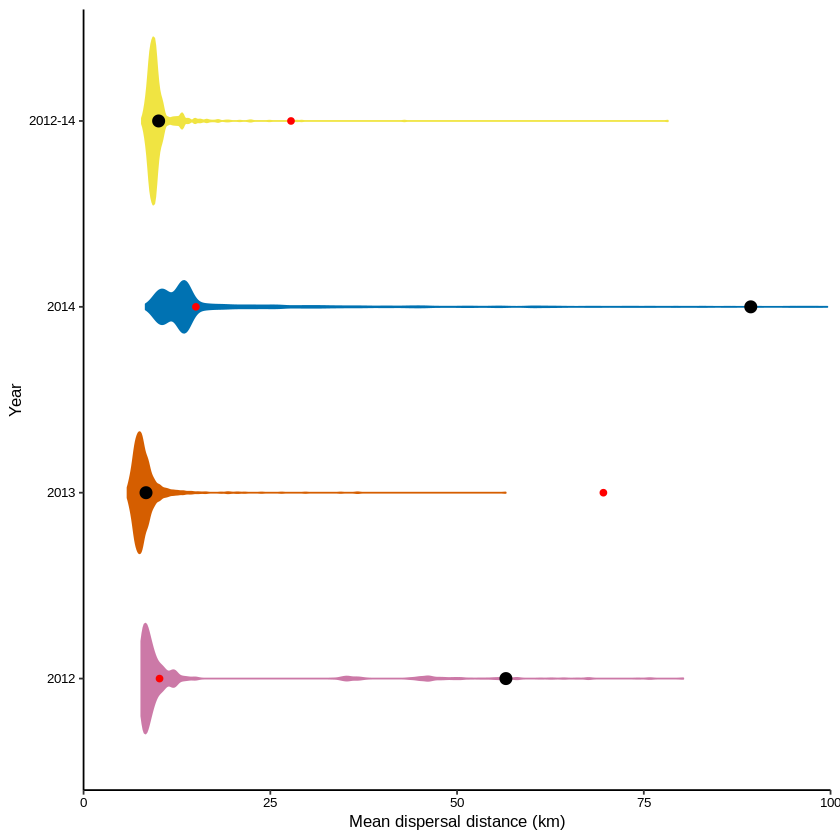

In [168]:
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
cbbPalette_rev <- rev(cbbPalette)

CombinedSims$year <- factor(CombinedSims$year, levels=c("2012", "2013", "2014", "2012-14"))
SimPlusGenFits$Year <- factor(SimPlusGenFits$Year, levels=c("2012", "2013", "2014", "2012-14"))
PointsToPlot <- CompareFits %>% filter(Adj=="SurvNoRecentRec")
PointsToPlot$Year <- factor(PointsToPlot$Year, levels=c("2012", "2013", "2014", "2012-14"))


mdd_violin <- ggplot(data=CombinedSims %>% filter(Adj=="SurvNoRecentRec"), aes(x=year, y=mdd, color=year, fill=year), alpha=0.5) +
    geom_violin() +
    geom_point(data=PointsToPlot, aes(x=Year, y=SimMDD), fill=NA, color="black", size=3) + 
    geom_point(data=PointsToPlot, aes(x=Year, y=GenMDD), fill="red", color="red") + # with all fits
    #geom_point(data=kernels %>% filter(Year %in% c("2012", "2013", "2014", "all")), aes(x=Year, y=MeanDispDist), fill="black",color="darkgray", shape=24) + #genetic estimates
    coord_flip() +
    scale_shape_discrete(name = "Adjustment", labels = c("only >3.5 cm", "none", "only >3.5 cm and survival weighting"))+
    #scale_x_continuous(limits = c(0, 100), expand=c(0,0)) +
    scale_y_continuous(limits = c(0, 100), expand = c(0,0))+
    theme(panel.grid.major = element_blank(),
    plot.margin=unit(c(0.2,0.2,0.2,0.2),"cm"),
    panel.grid.minor = element_blank(), 
    panel.background = element_blank(), #,
    axis.line = element_line(colour = "black")) +
    xlab("Year") + 
    ylab("Mean dispersal distance (km)") +
    theme(axis.text.x = element_text(size=8, color="black", family="Helvetica"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.text.y =  element_text(size=8, color="black", family="Helvetica"),
    axis.title.y =  element_text(size=10, color="black", family="Helvetica"), 
    axis.title.x =  element_text(size=10, color="black", family="Helvetica")) + 
    scale_colour_manual(values=cbbPalette_rev)+
    scale_fill_manual(values=cbbPalette_rev) +
    theme(legend.position = "none") 
    #scale_y_continuous(breaks = 1:2000, labels = c(1:50,"break",1000:2000))
mdd_violin 
ggplot2::ggsave(filename="SimMeanDispDistPlusGenPointsSurvNoRecentRec.png",  plot=mdd_violin, path="~/oceanography/script_output/KernelFits/Plots/")


Warning message:
“Removed 344 rows containing non-finite values (stat_ydensity).”Saving 6.67 x 6.67 in image
Warning message:
“Removed 344 rows containing non-finite values (stat_ydensity).”

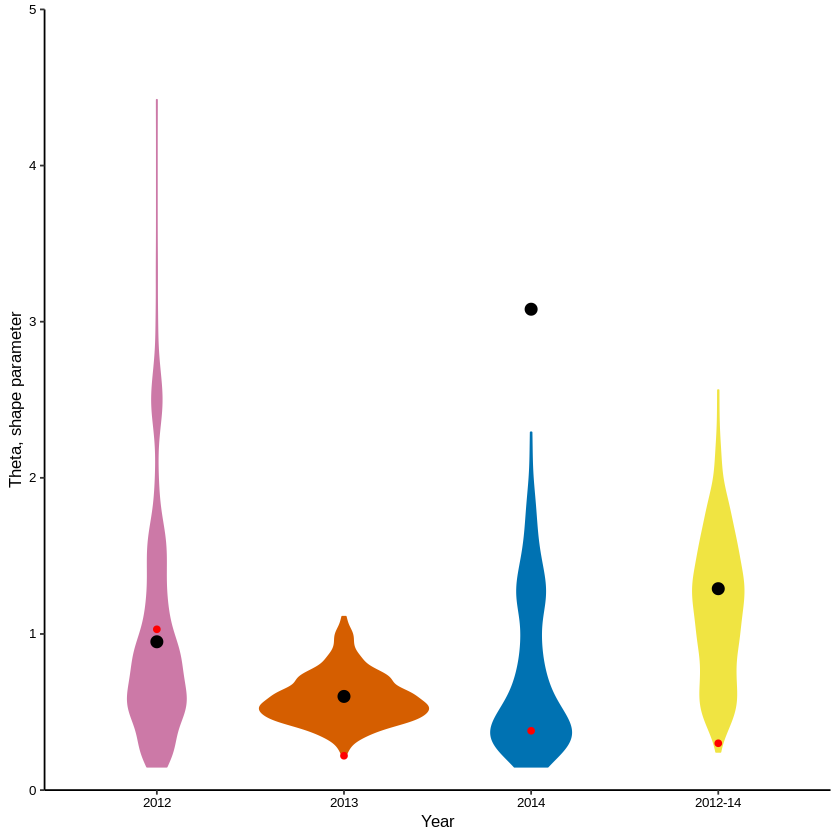

In [167]:
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
cbbPalette_rev <- rev(cbbPalette)

CombinedSims$year <- factor(CombinedSims$year, levels=c("2012", "2013", "2014", "2012-14"))
SimPlusGenFits$Year <- factor(SimPlusGenFits$Year, levels=c("2012", "2013", "2014", "2012-14"))
PointsToPlot <- CompareFits %>% filter(Adj=="SurvNoRecentRec")
PointsToPlot$Year <- factor(PointsToPlot$Year, levels=c("2012", "2013", "2014", "2012-14"))


theta_violin <- ggplot(data=CombinedSims %>% filter(Adj=="SurvNoRecentRec"), aes(x=year, y=theta, color=year, fill=year), alpha=0.5) +
    geom_violin() +
    geom_point(data=PointsToPlot, aes(x=Year, y=SimTheta), fill=NA, color="black", size=3) + 
    geom_point(data=PointsToPlot, aes(x=Year, y=GenTheta), fill="red", color="red") + # with all fits
    #geom_point(data=kernels %>% filter(Year %in% c("2012", "2013", "2014", "all")), aes(x=Year, y=MeanDispDist), fill="black",color="darkgray", shape=24) + #genetic estimates
   # coord_flip() +
    scale_shape_discrete(name = "Adjustment", labels = c("only >3.5 cm", "none", "only >3.5 cm and survival weighting"))+
    #scale_x_continuous(limits = c(0, 100), expand=c(0,0)) +
    scale_y_continuous(limits = c(0, 5), expand = c(0,0))+
    theme(panel.grid.major = element_blank(),
    plot.margin=unit(c(0.2,0.2,0.2,0.2),"cm"),
    panel.grid.minor = element_blank(), 
    panel.background = element_blank(), #,
    axis.line = element_line(colour = "black")) +
    xlab("Year") + 
    ylab("Theta, shape parameter") +
    theme(axis.text.x = element_text(size=8, color="black", family="Helvetica"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.text.y =  element_text(size=8, color="black", family="Helvetica"),
    axis.title.y =  element_text(size=10, color="black", family="Helvetica"), 
    axis.title.x =  element_text(size=10, color="black", family="Helvetica")) + 
    scale_colour_manual(values=cbbPalette_rev)+
    scale_fill_manual(values=cbbPalette_rev) +
    theme(legend.position = "none") 
    #scale_y_continuous(breaks = 1:2000, labels = c(1:50,"break",1000:2000))
theta_violin 
ggplot2::ggsave(filename="SimThetaPlusGenPointsSurvNoRecentRec.png",  plot=theta_violin, path="~/oceanography/script_output/KernelFits/Plots/")


In [154]:
str(PointsToPlot)

tibble [4 × 14] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ Year            : Factor w/ 4 levels "2012","2013",..: 1 4 2 3
 $ GenDist90       : num [1:4] 23.3 68.7 157.4 38.1
 $ GenK            : num [1:4] -2.36 1.68 4.04 0.49
 $ GenMDD          : num [1:4] 10.2 27.8 69.6 15
 $ GenMed          : num [1:4] 7.13 7.71 12.2 5.53
 $ GenTheta        : num [1:4] 1.03 0.3 0.22 0.38
 $ Adj             : chr [1:4] "SurvNoRecentRec" "SurvNoRecentRec" "SurvNoRecentRec" "SurvNoRecentRec"
 $ SimDist90       : num [1:4] 107.2 22.9 20.7 173.1
 $ SimK            : num [1:4] -1.11 -2.14 -0.61 -1.61
 $ SimMDD          : num [1:4] 56.54 10.05 8.36 89.32
 $ SimMed          : num [1:4] 9.67 6.86 4.14 16.66
 $ SimTheta        : num [1:4] 0.95 1.29 0.6 3.08
 $ MDDDiffGenVSim  : num [1:4] 46.4 17.7 61.2 74.3
 $ ThetaDiffGenVSim: num [1:4] 0.08 0.99 0.38 2.7
 - attr(*, "groups")= tibble [4 × 2] (S3: tbl_df/tbl/data.frame)
  ..$ Year : Factor w/ 4 levels "2012","2013",..: 1 2 3 4
  ..$ .rows: list<int> [1:4] 
  ..

In [161]:
#read in the seasonal simulation kernel fits

#no adjustments
SimulatedKernelsNEM <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsNEM.csv", header=T) %>%
    mutate(Adj="no")
SimulatedKernelsSWM <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsSWM.csv", header=T) %>%
    mutate(Adj="no")

#adjusting for survival and growth
SimulatedKernelsNEMSurvGrowth <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsNEMSurvGrowth.csv", header=T) %>%
    mutate(Adj="SurvGrowth")
SimulatedKernelsSWMSurvGrowth <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsSWMSurvGrowth.csv", header=T) %>%
    mutate(Adj="SurvGrowth")

#adjusting for growth
SimulatedKernelsNEMGrowth <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsNEMGrowth.csv", header=T) %>%
    mutate(Adj="Growth")
SimulatedKernelsSWMGrowth <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsSWMGrowth.csv", header=T) %>%
    mutate(Adj="Growth")

CombinedSeasons <- bind_rows(SimulatedKernelsNEM, SimulatedKernelsSWM, SimulatedKernelsNEMSurvGrowth, SimulatedKernelsSWMSurvGrowth, SimulatedKernelsNEMGrowth, SimulatedKernelsSWMGrowth) %>%
    rename(Season="season") 

#empirical seasons for 2012-2014
SeasonalKernels2012_14 <- read.csv(file="~/oceanography/empirical_data/genetics/SeasonalGenKernelsForROMSComp.csv", header=T) %>%
    rename(Season="season",GenK="k", GenTheta="theta", GenMDD="mdd", GenMed="med", GenDist90="dist90") %>%
    mutate(GenK=round(GenK, digits=2)) %>%
    mutate(GenTheta=round(GenTheta, digits=2)) %>%
    mutate(GenMDD=round(GenMDD, digits=2)) %>%
    mutate(TimeFrame="2012-14")#%>%
    #mutate(JoinKey="all")


SeasonalKernels2012_18 <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/tables/RecruitSizeAsSeasonlity_summary.csv", header=T) %>%
    select(Season, best_k, best_theta, MeanDispersalDistance, MedianDispersalDistance, Dist90Retained) %>%    
    rename(GenK="best_k", GenTheta="best_theta", GenMDD="MeanDispersalDistance", GenMed="MedianDispersalDistance", GenDist90="Dist90Retained") %>%
    mutate(GenMDD=round(GenMDD, digits=2)) %>%
    mutate(TimeFrame="2012-18")#%>%
    #mutate(JoinKey="all")

GenSeasonalKernels <- bind_rows(SeasonalKernels2012_14, SeasonalKernels2012_18)

In [151]:
head(CombinedSeasons)

Season,k,theta,mdd,med,dist90,iteration,Adj
NEM,-2.49,1.30,8.94,6.78,19.71,1,no
NEM,0.85,0.34,21.84,7.14,55.00,2,no
NEM,-1.38,0.64,10.05,5.59,24.73,3,no
NEM,-2.06,0.91,9.06,6.05,21.17,4,no
NEM,-2.52,1.33,9.04,6.91,19.86,5,no
NEM,-1.92,0.84,9.04,5.82,21.40,6,no


In [162]:
AvgSeasonalKernels <- CombinedSeasons %>% 
    select(-iteration) %>%
    group_by(Season, Adj) %>%
    summarise_each(funs(mean)) %>%
    mutate(k=round(k, digits=2)) %>%
    mutate(theta=round(theta, digits=2)) %>%
    mutate(mdd=round(mdd, digits=2))%>%
    mutate(med=round(med, digits=2))%>%
    mutate(dist90=round(dist90, digits=2)) %>%
    rename(AvgSimK="k", AvgSimTheta="theta", AvgSimMDD="mdd", AvgSimMed="med", AvgSimDist90="dist90") %>%
    mutate(TimeFrame="2012-14")# %>%
    #mutate(JoinKey="all")

In [189]:
SimPlusGenFitsSeasons <- right_join(AvgSeasonalKernels, GenSeasonalKernels, by=c("Season", "TimeFrame"))%>%
    mutate(MDDDiffGenVSim=abs(GenMDD-AvgSimMDD)) %>%
    arrange(MDDDiffGenVSim) %>%
    mutate(GenK=round(GenK, digits=2)) %>%
    mutate(GenTheta=round(GenTheta, digits=2)) %>%
    mutate(GenMDD=round(GenMDD, digits=2))

SimPlusGenFitsSeasons %>%
    group_by(Season) %>%
    filter(MDDDiffGenVSim==min(MDDDiffGenVSim, na.rm=T))

SimPlusGenFitsSeasons

#write.csv(SimPlusGenFits, file="~/oceanography/script_output/KernelFits/SimPlusGenKernelFitsSeasons.csv", row.names=F)

Season,Adj,AvgSimK,AvgSimTheta,AvgSimMDD,AvgSimMed,AvgSimDist90,TimeFrame,GenK,GenTheta,GenMDD,GenMed,GenDist90,MDDDiffGenVSim
SWM,no,-2.45,1.39,8.58,6.57,18.77,2012-14,-1.62,0.76,8.34,5.1,20.07,0.24
NEM,SurvGrowth,-2.02,1.17,10.10,6.69,23.37,2012-14,6.95,0.15,2755.86,212.8,4810.04,2745.76


Season,Adj,AvgSimK,AvgSimTheta,AvgSimMDD,AvgSimMed,AvgSimDist90,TimeFrame,GenK,GenTheta,GenMDD,GenMed,GenDist90,MDDDiffGenVSim
SWM,no,-2.45,1.39,8.58,6.57,18.77,2012-14,-1.62,0.76,8.34,5.10,20.07,0.24
SWM,SurvGrowth,-2.44,1.37,8.63,6.59,18.94,2012-14,-1.62,0.76,8.34,5.10,20.07,0.29
SWM,Growth,-2.40,1.32,8.66,6.52,19.13,2012-14,-1.62,0.76,8.34,5.10,20.07,0.32
NEM,SurvGrowth,-2.02,1.17,10.10,6.69,23.37,2012-14,6.95,0.15,2755.86,212.80,4810.04,2745.76
NEM,Growth,-2.04,1.17,10.01,6.66,23.13,2012-14,6.95,0.15,2755.86,212.80,4810.04,2745.85
NEM,no,-2.08,1.26,9.95,6.72,22.82,2012-14,6.95,0.15,2755.86,212.80,4810.04,2745.91
SWM,NA,NA,NA,NA,NA,NA,2012-18,-2.60,1.58,8.57,6.87,18.32,NA
NEM,NA,NA,NA,NA,NA,NA,2012-18,-0.89,0.56,9.45,4.82,23.60,NA


Warning message:
“Removed 2 rows containing missing values (geom_point).”Saving 6.67 x 6.67 in image
Warning message:
“Removed 2 rows containing missing values (geom_point).”

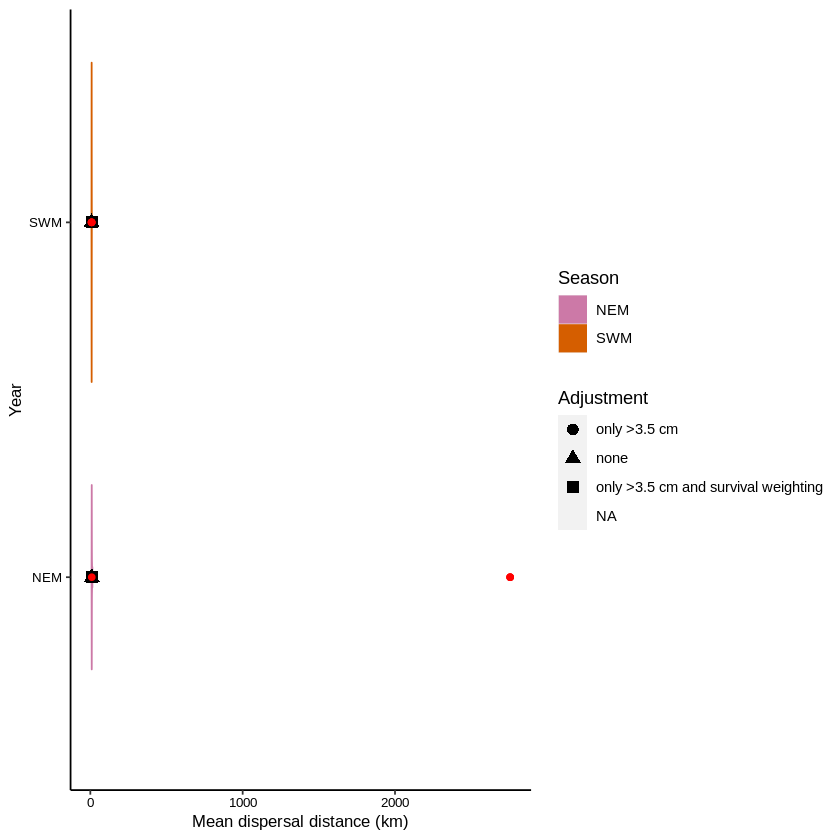

In [193]:
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
cbbPalette_rev <- rev(cbbPalette)

#CombinedSeasons$Season <- factor(CombinedSeasons$Season, levels=c("2012", "2013", "2014", "2012-14"))
#SimPlusGenFitsSeasons$Season <- factor(SimPlusGenFitsSeasons$Season, levels=c("2012", "2013", "2014", "2012-14"))

mdd_violin <- ggplot(data=CombinedSeasons, aes(x=Season, y=mdd, color=Season, fill=Season), alpha=0.5) +
    geom_violin() +
    geom_point(data=SimPlusGenFitsSeasons, aes(x=Season, y=AvgSimMDD, shape=Adj), fill=NA, color="black", size=3) + 
    geom_point(data=SimPlusGenFitsSeasons, aes(x=Season, y=GenMDD), fill="red", color="red") + # with all fits
    #geom_point(data=kernels %>% filter(Year %in% c("2012", "2013", "2014", "all")), aes(x=Year, y=MeanDispDist), fill="black",color="darkgray", shape=24) + #genetic estimates
    coord_flip() +
    scale_shape_discrete(name = "Adjustment", labels = c("only >3.5 cm", "none", "only >3.5 cm and survival weighting"))+
    #scale_x_continuous(limits = c(0, 100), expand=c(0,0)) +
    #scale_y_continuous(limits = c(0, 30), expand = c(0,0))+
    theme(panel.grid.major = element_blank(),
    plot.margin=unit(c(0.2,0.2,0.2,0.2),"cm"),
    panel.grid.minor = element_blank(), 
    panel.background = element_blank(), #,
    axis.line = element_line(colour = "black")) +
    xlab("Year") + 
    ylab("Mean dispersal distance (km)") +
    theme(axis.text.x = element_text(size=8, color="black", family="Helvetica"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.text.y =  element_text(size=8, color="black", family="Helvetica"),
    axis.title.y =  element_text(size=10, color="black", family="Helvetica"), 
    axis.title.x =  element_text(size=10, color="black", family="Helvetica")) + 
    scale_colour_manual(values=cbbPalette_rev)+
    scale_fill_manual(values=cbbPalette_rev)
    #scale_y_continuous(breaks = 1:2000, labels = c(1:50,"break",1000:2000))
mdd_violin
ggplot2::ggsave(filename="SimMeanDispDistPlusGenPointsSeasons.png",  plot=mdd_violin, path="~/oceanography/script_output/KernelFits/Plots/")


In [192]:
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
cbbPalette_rev <- rev(cbbPalette)

mdd_violin <- ggplot(data=SimCombinedSummary, aes(x=year, y=mdd, color=year, fill=year), alpha=0.5) +
    geom_violin() +
    #geom_point(data=AverageFits2, aes(x=year, y=mdd), fill="snow",color="darkgray", shape=21) + #without borderline fits
    geom_point(data=AverageFits, aes(x=year, y=mdd), fill="black ",color="darkgray", shape=21) + # with all fits
    geom_point(data=kernels %>% filter(Year %in% c("2012", "2013", "2014", "all")), aes(x=Year, y=MeanDispDist), fill="black",color="darkgray", shape=24) + #genetic estimates
    coord_flip() +
    #scale_x_continuous(limits = c(0, 100), expand=c(0,0)) +
    scale_y_continuous(limits = c(0, 83), expand = c(0,0))+
    theme(panel.grid.major = element_blank(),
    plot.margin=unit(c(0.2,0.2,0.2,0.2),"cm"),
    panel.grid.minor = element_blank(), 
    panel.background = element_blank(), #,
    axis.line = element_line(colour = "black")) +
    xlab("Year") + 
    ylab("Mean dispersal distance (km)") +
    theme(axis.text.x = element_text(size=8, color="black", family="Helvetica"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.text.y =  element_text(size=8, color="black", family="Helvetica"),
    axis.title.y =  element_text(size=10, color="black", family="Helvetica"), 
    axis.title.x =  element_text(size=10, color="black", family="Helvetica"),    
    legend.position = "none") + 
    scale_colour_manual(values=cbbPalette_rev)+
    scale_fill_manual(values=cbbPalette_rev)
    #scale_y_continuous(breaks = 1:2000, labels = c(1:50,"break",1000:2000))
mdd_violin
ggplot2::ggsave(filename="SimMeanDispDistPlusGenPoints.png",  plot=mdd_violin, path="~/oceanography/script_output/KernelFits/Plots/")


ERROR: Error in ggplot(data = SimCombinedSummary, aes(x = year, y = mdd, color = year, : object 'SimCombinedSummary' not found


In [115]:
(SimPlusGenFits)

year,SimK,SimTheta,SimMDD,SimKurtosis,GenK,GenTheta,GenMDD,GenMedDispDist
2012,-1.828326,1.250510,10.127328,15.518027,-2.36,1.03,10.165094,7.13
2013,-1.242150,0.804757,8.091848,13.967938,4.04,0.22,69.586280,12.20
2014,-1.926596,1.243059,26.376964,86.415760,0.49,0.38,15.037515,5.53
all,-1.919426,1.014670,10.219857,8.635482,-2.51,1.49,8.153016,6.44


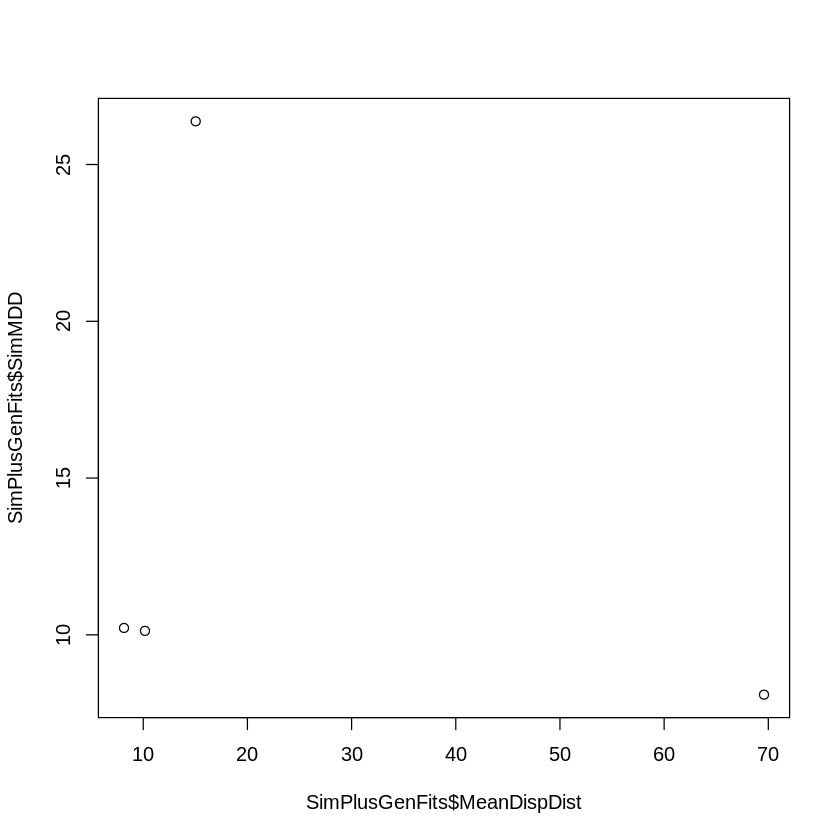

In [95]:
plot(SimPlusGenFits$SimMDD~SimPlusGenFits$MeanDispDist)

In [60]:
MDDAllYear <- CombinedSims %>% 
    filter(year=="all")
#pdf("~/oceanography/script_output/KernelFits/Plots/MeanDispDistHist2012-14.pdf")
hist(MDDAllYear$mdd, breaks=100, main=NULL, xlab="Mean dispersal distance (km)")
#dev.off()
summary(MDDAllYear$mdd)

Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”

ERROR: Error in hist.default(MDDAllYear$mdd, breaks = 100, main = NULL, xlab = "Mean dispersal distance (km)"): character(0)


In [97]:
#test for correlations
cor.test(SimPlusGenFits$SimMDD, SimPlusGenFits$MeanDispDist,  method = "pearson")
cor.test(SimPlusGenFits$SimTheta, SimPlusGenFits$GenTheta,  method = "pearson")



	Pearson's product-moment correlation

data:  SimPlusGenFits$SimMDD and SimPlusGenFits$MeanDispDist
t = -0.53384, df = 2, p-value = 0.6468
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9812079  0.9202897
sample estimates:
       cor 
-0.3531582 



	Pearson's product-moment correlation

data:  SimPlusGenFits$SimTheta and SimPlusGenFits$GenTheta
t = 0.32913, df = 2, p-value = 0.7733
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9389710  0.9752907
sample estimates:
      cor 
0.2266754 


In [17]:
#seasons
SimulatedKernelsNEM <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsNEM.csv", header=T)
SimulatedKernelsSWM <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsSWM.csv", header=T)
CombinedSeasons <- bind_rows(SimulatedKernelsNEM, SimulatedKernelsSWM) %>%
    select(-iteration)

In [24]:
SeasonalKernels <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/tables/RecruitSizeAsSeasonlity_summary.csv", header=T)
head(SeasonalKernels)

Season,RecruitSizeAtSampling,best_k,best_theta,k_CI95_lower,k_CI95_upper,theta_CI95_lower,theta_CI95_upper,MeanDispersalDistance,MeanDispDist_CI95_lower,MeanDispDist_CI95_upper,MedianDispersalDistance,MedianDispDist_CI95_lower,MedianDispDist_CI95_upper,Dist90Retained
SWM,> 4.5 cm,-2.60,1.58,-2.63,-2.47,1.34,1.59,8.574871,7.132250,10.39623,6.87,4.93,9.28,18.32
NEM,< 3.5 cm,-0.89,0.56,-1.46,-0.74,0.54,0.61,9.446898,6.014163,4272.46841,4.82,3.24,323.37,23.60
